> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image1.png"
> style="width:0.625in;height:0.52083in" />

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>import</strong> tensorflow <strong>as</strong> tf<br />
<strong>import</strong> logging<br />
tf<strong>.</strong>get_logger()<strong>.</strong>setLevel(logging<strong>.</strong>ERROR)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>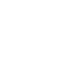</p>
</blockquote></th>
<th><blockquote>
<p>Rešava se problem predikcije hand gesture-a na osnovu slike. Podaci
su klasifikovani u 8 klasa(semiOpenPalm, fingerSymbols, semiOpenFist,
closedFist, singleFingerBend, fingerCircle, openPalm,
multiFingerBend).</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image3.png"
> style="width:0.625in;height:0.92778in" />

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>import</strong> numpy <strong>as</strong> np<br />
<strong>import</strong> matplotlib.pyplot <strong>as</strong> plt<br />
<strong>import</strong> cv2<br />
main_path <strong>=</strong>'./images/'<br />
img_size <strong>=</strong>(128,128)<br />
batch_size <strong>=</strong>64</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image4.png"
> style="width:0.625in;height:2.02222in" />

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>from</strong> keras.utils <strong>import</strong>
image_dataset_from_directory<br />
Xtrain <strong>=</strong> image_dataset_from_directory(main_path,<br />
subset<strong>=</strong>'training',
validation_split<strong>=</strong>0.2,
image_size<strong>=</strong>img_size,
batch_size<strong>=</strong>batch_size, seed<strong>=</strong>42)<br />
Xval <strong>=</strong> image_dataset_from_directory(main_path,<br />
subset<strong>=</strong>'validation',
validation_split<strong>=</strong>0.2,
image_size<strong>=</strong>img_size,
batch_size<strong>=</strong>batch_size, seed<strong>=</strong>42)<br />
classes <strong>=</strong> Xtrain<strong>.</strong>class_names</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>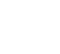</p>
</blockquote></th>
<th><blockquote>
<p>Found 2167 files belonging to 8 classes.<br />
Using 1734 files for training.</p>
<p>Found 2167 files belonging to 8 classes.<br />
Using 433 files for validation.</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><blockquote>
<p>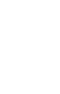</p>
</blockquote></td>
<td><blockquote>
<p>Ulazni dataset je podeljen na trening i test set koji ujedno
predstavlja i validacioni set. Podela je bitna kako bi imali 2 odvojena
skupa od kojih na jednom treniramo nas model, a na drugom proveravamo
njegove performanse i koliko dobro generalizuje. Za test set je uzeto
20% pocetnog dataseta kako bi imali dovoljno podataka da obucimo mrezu,
pa da je posle testiramo na test set-u.</p>
</blockquote></td>
</tr>
<tr class="even">
<td colspan="2"><blockquote>
<p>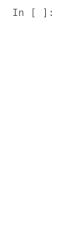</p>
</blockquote>
<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>N <strong>=</strong>8<br />
plt<strong>.</strong>figure()<br />
fig, ax <strong>=</strong> plt<strong>.</strong>subplots(4,2,
figsize<strong>=</strong>(10,10))</p>
<p>seen <strong>=</strong>{}<br />
postion <strong>=</strong>0</p>
<p><strong>for</strong> img, lab <strong>in</strong> Xtrain:<br />
<strong>for</strong> i <strong>in</strong> range(len(lab)):<br />
<strong>if</strong> classes[lab[i]]<strong>notin</strong>
seen<strong>.</strong>keys():<br />
plt<strong>.</strong>subplot(4, int(N<strong>/</strong>4),
postion<strong>+</strong>1)<br />
postion <strong>+=</strong>1<br />
plt<strong>.</strong>imshow(img[i]<strong>.</strong>numpy()<strong>.</strong>astype('uint8'))<br />
plt<strong>.</strong>title(classes[lab[i]])<br />
plt<strong>.</strong>axis('off')<br />
seen[classes[lab[i]]]<strong>=</strong>1<br />
fig<strong>.</strong>tight_layout()</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></td>
</tr>
<tr class="odd">
<td><blockquote>
<p></p>
</blockquote></td>
<td><blockquote>
<p>&lt;Figure size 432x288 with 0 Axes&gt;</p>
</blockquote></td>
</tr>
</tbody>
</table>

> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image9.png"
> style="width:4.225in;height:8.38472in" />
>
> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image10.png"
> style="width:0.625in;height:2.42778in" />

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>class_count <strong>=</strong>{}<br />
<strong>for</strong> img, lab <strong>in</strong> Xtrain:<br />
<strong>for</strong> i <strong>in</strong> range(len(lab)):<br />
<strong>if</strong> classes[lab[i]]<strong>in</strong>
class_count<strong>.</strong>keys():<br />
class_count[classes[lab[i]]]<strong>+=</strong>1<br />
<strong>else</strong>:<br />
class_count[classes[lab[i]]]<strong>=</strong>1</p>
<p><strong>for</strong> img, lab <strong>in</strong> Xval:<br />
<strong>for</strong> i <strong>in</strong> range(len(lab)):<br />
<strong>if</strong> classes[lab[i]]<strong>in</strong>
class_count<strong>.</strong>keys():<br />
class_count[classes[lab[i]]]<strong>+=</strong>1<br />
<strong>else</strong>:<br />
class_count[classes[lab[i]]]<strong>=</strong>1</p>
<p><strong>for</strong> key,val <strong>in</strong>
class_count<strong>.</strong>items():<br />
print(key, val)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

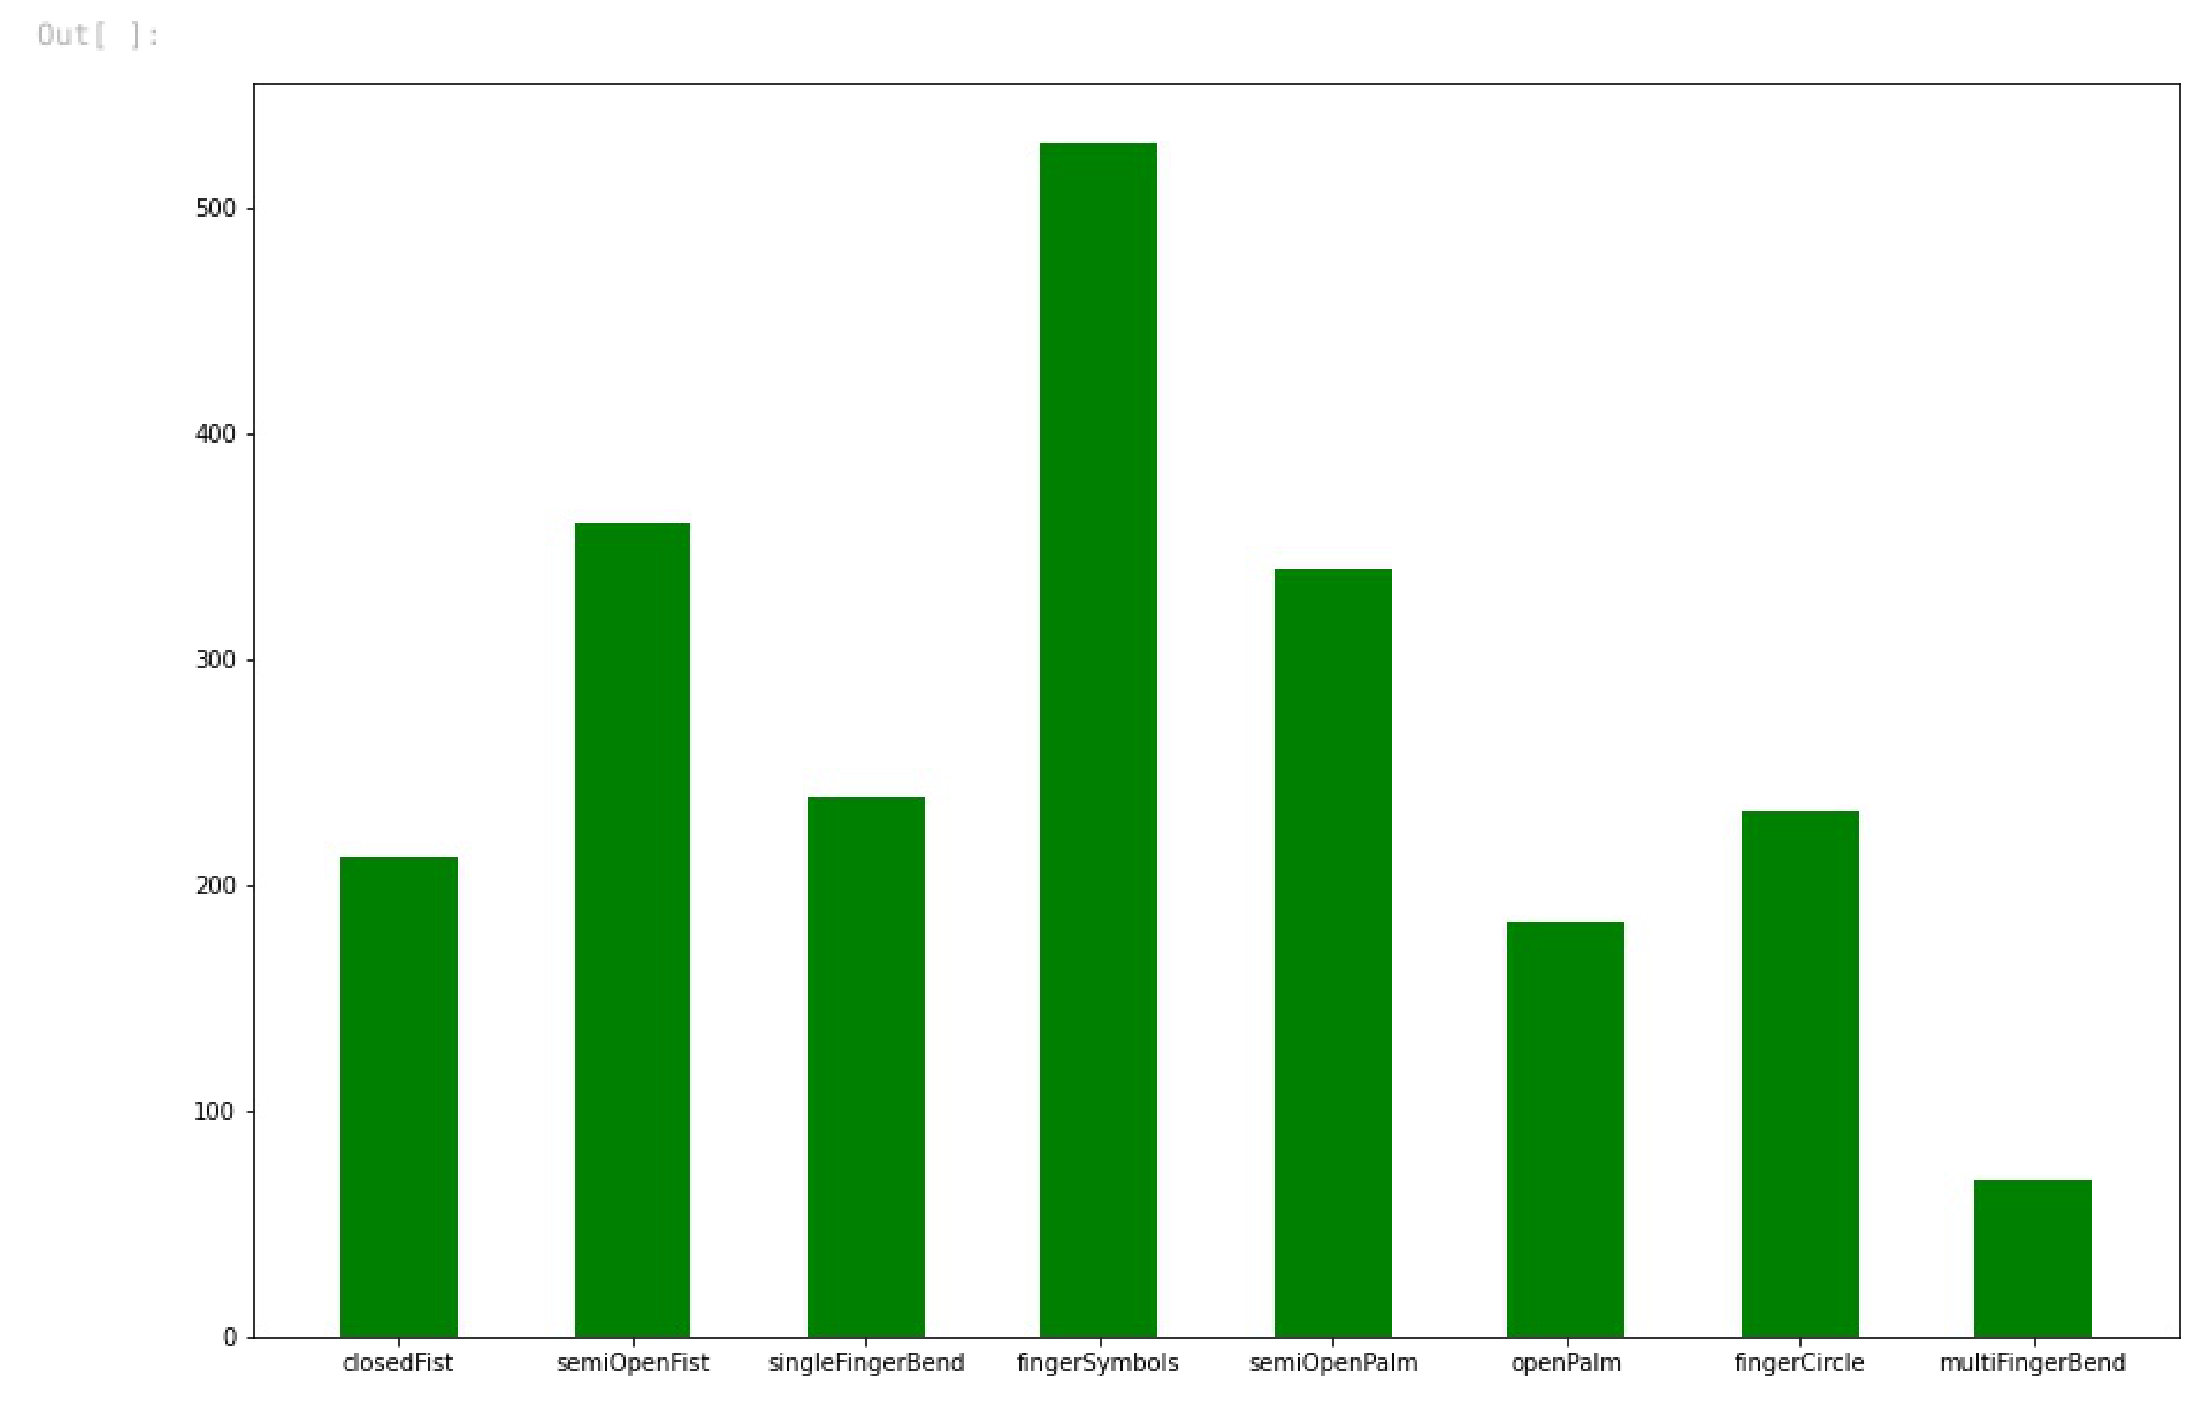

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>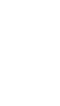</p>
</blockquote></th>
<th><blockquote>
<p>closedFist 212<br />
semiOpenFist 361<br />
singleFingerBend 239<br />
fingerSymbols 529<br />
semiOpenPalm 340<br />
openPalm 184<br />
fingerCircle 233<br />
multiFingerBend 69</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image12.png"
> style="width:0.625in;height:0.38472in" />

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>plt<strong>.</strong>figure(figsize<strong>=</strong>(15,10))<br />
plt<strong>.</strong>bar(class_count<strong>.</strong>keys(),
class_count<strong>.</strong>values(),0.5,
color<strong>=</strong>'g')</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> \<BarContainer object of 8 artists\>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>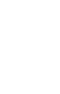</p>
</blockquote></th>
<th><blockquote>
<p>S obzirom da multiFingerBend ima 5 puta manje odbiraka nego
fingerSymbols, podaci nisu balansirani. Dakle, potrebno je izvršiti
balansiranje podataka kako bi se model obučio jednako dobro za sve
klase. Primenjen je class_weight metoda gde se svakoj klasi dodaje
weight tako da klase koji imaju manje odbiraka više utiču na loss, a one
koje imaju više odbiraka manje utiču na loss.</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image13.png"
> style="width:0.625in;height:1.46806in" />

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>from</strong> keras <strong>import</strong> layers<br />
<strong>from</strong> keras <strong>import</strong> Sequential<br />
data_augmentation <strong>=</strong> Sequential(<br />
[<br />
layers<strong>.</strong>RandomFlip("horizontal_and_vertical",
input_shape<strong>=</strong>(img_size[0], img_size[1],3)),
layers<strong>.</strong>RandomRotation(0.2),<br />
layers<strong>.</strong>RandomZoom(0.1),<br />
layers<strong>.</strong>RandomContrast(0.1)<br />
]<br />
)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>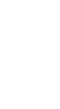</p>
</blockquote></th>
<th><blockquote>
<p>Dodato je 5 modifikacija nad datasetom. RandomFlip, RandomRotation i
RandomZoom su iskorisceni kako bi postili sto raznovrsnije slike u
odnosu na originalni dataset. U nasem datasetu je postoji slicnost
izmedju pozadine i objekta (šake) i zbog toga je dodat<br />
RandomContrast kako bi izostrili ivice objekta i povecali kontrast
izmedju njega i pozadine i onda bi ga model lakse prepoznao i dohvatio
neophodna obelezja. Takodje, postoji i Rescaling sloj koji je dodat
kasnije u kodu.</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image15.png"
> style="width:0.625in;height:1.14583in" />

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>N <strong>=</strong>10<br />
plt<strong>.</strong>figure()<br />
fig, ax <strong>=</strong> plt<strong>.</strong>subplots(4,2,
figsize<strong>=</strong>(10,10))<br />
<strong>for</strong> img, lab <strong>in</strong>
Xtrain<strong>.</strong>take(1):<br />
plt<strong>.</strong>title(classes[lab[0]])<br />
<strong>for</strong> i <strong>in</strong> range(N):<br />
aug_img <strong>=</strong> data_augmentation(img)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image17.png"
> style="width:0.625in;height:0.60278in" /><img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image19.png"
> style="width:6.31389in;height:3.57174in" />

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>plt<strong>.</strong>subplot(2, int(N<strong>/</strong>2),
i<strong>+</strong>1)<br />
plt<strong>.</strong>imshow(aug_img[0]<strong>.</strong>numpy()<strong>.</strong>astype('uint8'))<br />
plt<strong>.</strong>axis('off')<br />
fig<strong>.</strong>tight_layout()</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> \<Figure size 432x288 with 0 Axes\>
>
> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image18.png"
> style="width:0.625in;height:3.51111in" />

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>from</strong> keras <strong>import</strong> Sequential<br />
<strong>from</strong> keras <strong>import</strong> layers<br />
<strong>from</strong> keras.optimizers <strong>import</strong>
Adam<br />
<strong>from</strong> keras.losses <strong>import</strong>
SparseCategoricalCrossentropy</p>
<p>num_classes <strong>=</strong> len(classes)<br />
model <strong>=</strong> Sequential([<br />
data_augmentation,<br />
layers<strong>.</strong>Rescaling(1.<strong>/</strong>255,
input_shape<strong>=</strong>(img_size[0], img_size[1],3)),
layers<strong>.</strong>Conv2D(16,3, padding<strong>=</strong>'same',
activation<strong>=</strong>'relu'),<br />
layers<strong>.</strong>MaxPooling2D(),<br />
layers<strong>.</strong>Conv2D(32,3, padding<strong>=</strong>'same',
activation<strong>=</strong>'relu'),<br />
layers<strong>.</strong>MaxPooling2D(),<br />
layers<strong>.</strong>Conv2D(64,3, padding<strong>=</strong>'same',
activation<strong>=</strong>'relu'),<br />
layers<strong>.</strong>MaxPooling2D(),<br />
layers<strong>.</strong>Dropout(0.2),<br />
layers<strong>.</strong>Flatten(),<br />
layers<strong>.</strong>Dense(256,
activation<strong>=</strong>'relu'),<br />
layers<strong>.</strong>Dense(128,
activation<strong>=</strong>'relu'),<br />
layers<strong>.</strong>Dense(num_classes,
activation<strong>=</strong>'softmax')<br />
])<br />
model<strong>.</strong>summary()<br />
model<strong>.</strong>compile(Adam(learning_rate<strong>=</strong>0.001),<br />
loss<strong>=</strong>SparseCategoricalCrossentropy(),<br />
metrics<strong>=</strong>'accuracy')</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>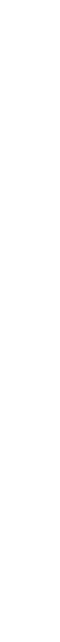</p>
<p>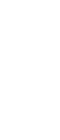</p>
</blockquote></th>
<th><blockquote>
<p>Model: "sequential_1"<br />
_________________________________________________________________ Layer
(type) Output Shape Param #
=================================================================
sequential (Sequential) (None, 128, 128, 3) 0<br />
rescaling (Rescaling) (None, 128, 128, 3) 0<br />
conv2d (Conv2D) (None, 128, 128, 16) 448 max_pooling2d (MaxPooling2D
(None, 64, 64, 16) 0<br />
)<br />
_________________________________________________________________ Layer
(type) Output Shape Param #
=================================================================
sequential (Sequential) (None, 128, 128, 3) 0<br />
rescaling (Rescaling) (None, 128, 128, 3) 0<br />
conv2d (Conv2D) (None, 128, 128, 16) 448 max_pooling2d (MaxPooling2D
(None, 64, 64, 16) 0<br />
)<br />
conv2d_1 (Conv2D) (None, 64, 64, 32) 4640 max_pooling2d_1 (MaxPooling
(None, 32, 32, 32) 0<br />
2D)<br />
conv2d_2 (Conv2D) (None, 32, 32, 64) 18496 max_pooling2d_2 (MaxPooling
(None, 16, 16, 64) 0<br />
2D)<br />
dropout (Dropout) (None, 16, 16, 64) 0<br />
flatten (Flatten) (None, 16384) 0<br />
dense (Dense) (None, 256) 4194560 dense_1 (Dense) (None, 128) 32896
dense_2 (Dense) (None, 8) 1032
================================================================= Total
params: 4,252,072<br />
Trainable params: 4,252,072<br />
Non-trainable params: 0<br />
_________________________________________________________________</p>
<p>Za kriterijumsku funkciju uzeta je SparseCategoricalCrossentropy zato
sto je pre svega potrebno da vrsimo klasifikaciju u vise klasa, pa
koristimo krosentropiju, a takodje nase predikcije nisu u formatu
one-hot-encoded(odnosno ako je predict dao klasu 2 kao vrednost, output
nije [0, 1, 0, ...] vec [2]), vec je to broj klase u koju je model
svrstao dati primerak. Za funkciju aktivacije neurona uzeta je
standardno ReLU funkcija tako da sve sto je manje od 0 stavimo na
0(pretvorimo u crne piksele ako je u pitanju piksel) koja je veoma
pogodna za obucavanje jer je linearna u pozitivnom delu i ako smo
pogresili, imamo dobar gradijent za update pojacanja.</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image22.png"
> style="width:0.625in;height:2.29167in" />

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>from</strong> sklearn.utils <strong>import</strong>
class_weight</p>
<p>labels_list <strong>=</strong>[]</p>
<p><strong>for</strong> img, lab <strong>in</strong> Xtrain:<br />
<strong>for</strong> l <strong>in</strong> lab:<br />
labels_list<strong>.</strong>append(l)</p>
<p>labels <strong>=</strong>
np<strong>.</strong>array(labels_list)<br />
weights <strong>=</strong>
class_weight<strong>.</strong>compute_class_weight(class_weight<strong>=</strong>'balanced',
classes<strong>=</strong>np<strong>.</strong>unique(labels),
y<strong>=</strong>labels)</p>
<p>class_weights <strong>=</strong>{}<br />
<strong>for</strong> i <strong>in</strong> range(len(weights)):<br />
class_weights[i]<strong>=</strong> weights[i]</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image23.png"
> style="width:0.625in;height:0.8125in" />

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>from</strong> keras.callbacks <strong>import</strong>
EarlyStopping<br />
es <strong>=</strong> EarlyStopping(monitor<strong>=</strong>'val_loss',
patience<strong>=</strong>10, mode<strong>=</strong>'min') history
<strong>=</strong> model<strong>.</strong>fit(Xtrain,</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image24.png"
> style="width:0.625in;height:0.73889in" />

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>epochs<strong>=</strong>50,<br />
validation_data<strong>=</strong>Xval,<br />
callbacks<strong>=</strong>[es],<br />
class_weight<strong>=</strong>class_weights,<br />
verbose<strong>=</strong>1)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>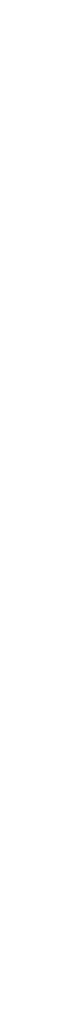</p>
</blockquote></th>
<th><blockquote>
<p>Epoch 1/50<br />
28/28 [==============================] - 19s 525ms/step - loss: 1.9812 -
accuracy: 0.2405 - val_loss: 2.0005 - val_accuracy: 0.2379<br />
Epoch 2/50<br />
28/28 [==============================] - 15s 540ms/step - loss: 1.9784 -
accuracy: 0.2457 - val_loss: 1.9708 - val_accuracy: 0.2379<br />
Epoch 3/50<br />
28/28 [==============================] - 15s 545ms/step - loss: 1.9600 -
accuracy: 0.2457 - val_loss: 1.9482 - val_accuracy: 0.2379<br />
Epoch 4/50<br />
28/28 [==============================] - 16s 553ms/step - loss: 1.9421 -
accuracy: 0.2439 - val_loss: 1.9387 - val_accuracy: 0.2379<br />
Epoch 5/50<br />
28/28 [==============================] - 16s 554ms/step - loss: 1.9041 -
accuracy: 0.2636 - val_loss: 1.8711 - val_accuracy: 0.2748<br />
Epoch 6/50<br />
28/28 [==============================] - 16s 558ms/step - loss: 1.8810 -
accuracy: 0.2468 - val_loss: 1.8793 - val_accuracy: 0.2564<br />
Epoch 7/50<br />
28/28 [==============================] - 16s 558ms/step - loss: 1.8400 -
accuracy: 0.2884 - val_loss: 1.8399 - val_accuracy: 0.2587<br />
Epoch 8/50<br />
28/28 [==============================] - 16s 556ms/step - loss: 1.8070 -
accuracy: 0.3005 - val_loss: 1.8084 - val_accuracy: 0.3164<br />
Epoch 9/50<br />
28/28 [==============================] - 16s 567ms/step - loss: 1.8016 -
accuracy: 0.3351 - val_loss: 1.8305 - val_accuracy: 0.2748<br />
Epoch 10/50<br />
28/28 [==============================] - 19s 668ms/step - loss: 1.7843 -
accuracy: 0.3328 - val_loss: 1.7161 - val_accuracy: 0.3464<br />
Epoch 11/50<br />
28/28 [==============================] - 16s 576ms/step - loss: 1.7214 -
accuracy: 0.3558 - val_loss: 1.6636 - val_accuracy: 0.4018<br />
Epoch 12/50<br />
28/28 [==============================] - 17s 587ms/step - loss: 1.7222 -
accuracy: 0.3472 - val_loss: 1.6440 - val_accuracy: 0.3672<br />
Epoch 13/50<br />
28/28 [==============================] - 16s 574ms/step - loss: 1.6854 -
accuracy: 0.3610 - val_loss: 1.6436 - val_accuracy: 0.3811<br />
Epoch 14/50<br />
28/28 [==============================] - 16s 574ms/step - loss: 1.6224 -
accuracy: 0.3847 - val_loss: 1.5703 - val_accuracy: 0.3972<br />
Epoch 15/50<br />
28/28 [==============================] - 20s 699ms/step - loss: 1.5751 -
accuracy: 0.4095 - val_loss: 1.5622 - val_accuracy: 0.4226<br />
Epoch 16/50<br />
28/28 [==============================] - 20s 698ms/step - loss: 1.5438 -
accuracy: 0.4273 - val_loss: 1.5317 - val_accuracy: 0.4134<br />
Epoch 17/50<br />
28/28 [==============================] - 18s 633ms/step - loss: 1.4915 -
accuracy: 0.4360 - val_loss: 1.5171 - val_accuracy: 0.4388<br />
Epoch 18/50<br />
28/28 [==============================] - 24s 851ms/step - loss: 1.4866 -
accuracy: 0.4493 - val_loss: 1.5754 - val_accuracy: 0.3972<br />
Epoch 19/50<br />
28/28 [==============================] - 23s 816ms/step - loss: 1.3936 -
accuracy: 0.4960 - val_loss: 1.4460 - val_accuracy: 0.4388<br />
Epoch 20/50<br />
28/28 [==============================] - 21s 740ms/step - loss: 1.3857 -
accuracy: 0.4833 - val_loss: 1.4380 - val_accuracy: 0.4226<br />
Epoch 21/50<br />
28/28 [==============================] - 20s 686ms/step - loss: 1.3432 -
accuracy: 0.4948 - val_loss: 1.4181 - val_accuracy: 0.4573<br />
Epoch 22/50<br />
28/28 [==============================] - 20s 685ms/step - loss: 1.3374 -
accuracy: 0.4971 - val_loss: 1.4733 - val_accuracy: 0.4596<br />
Epoch 23/50<br />
28/28 [==============================] - 19s 671ms/step - loss: 1.3545 -
accuracy: 0.4977 - val_loss: 1.3785 - val_accuracy: 0.4804<br />
Epoch 24/50<br />
28/28 [==============================] - 18s 632ms/step - loss: 1.2700 -
accuracy: 0.5334 - val_loss: 1.3490 - val_accuracy: 0.4965<br />
Epoch 25/50<br />
28/28 [==============================] - 18s 634ms/step - loss: 1.2387 -
accuracy: 0.5502 - val_loss: 1.3200 - val_accuracy: 0.5035<br />
Epoch 26/50<br />
28/28 [==============================] - 18s 619ms/step - loss: 1.2052 -
accuracy: 0.5507 - val_loss: 1.3481 - val_accuracy: 0.4919</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>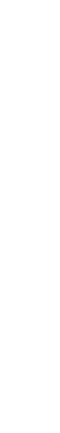</p>
</blockquote></th>
<th><blockquote>
<p>Epoch 27/50<br />
28/28 [==============================] - 18s 619ms/step - loss: 1.1916 -
accuracy: 0.5536 - val_loss: 1.2798 - val_accuracy: 0.5173<br />
Epoch 28/50<br />
28/28 [==============================] - 18s 629ms/step - loss: 1.1414 -
accuracy: 0.5750 - val_loss: 1.2827 - val_accuracy: 0.5104<br />
Epoch 29/50<br />
28/28 [==============================] - 18s 626ms/step - loss: 1.1483 -
accuracy: 0.5848 - val_loss: 1.3696 - val_accuracy: 0.5035<br />
Epoch 30/50<br />
28/28 [==============================] - 18s 632ms/step - loss: 1.0915 -
accuracy: 0.5963 - val_loss: 1.3781 - val_accuracy: 0.4942<br />
Epoch 31/50<br />
28/28 [==============================] - 18s 635ms/step - loss: 1.0579 -
accuracy: 0.6165 - val_loss: 1.3759 - val_accuracy: 0.4942<br />
Epoch 32/50<br />
28/28 [==============================] - 19s 656ms/step - loss: 1.0807 -
accuracy: 0.6073 - val_loss: 1.3329 - val_accuracy: 0.5196<br />
Epoch 33/50<br />
28/28 [==============================] - 18s 651ms/step - loss: 1.0467 -
accuracy: 0.6188 - val_loss: 1.3439 - val_accuracy: 0.4896<br />
Epoch 34/50<br />
28/28 [==============================] - 18s 637ms/step - loss: 1.0027 -
accuracy: 0.6084 - val_loss: 1.3223 - val_accuracy: 0.5289<br />
Epoch 35/50<br />
28/28 [==============================] - 18s 654ms/step - loss: 0.9891 -
accuracy: 0.6292 - val_loss: 1.3314 - val_accuracy: 0.5127<br />
Epoch 36/50<br />
28/28 [==============================] - 18s 647ms/step - loss: 0.9368 -
accuracy: 0.6626 - val_loss: 1.4536 - val_accuracy: 0.4804<br />
Epoch 37/50<br />
28/28 [==============================] - 18s 629ms/step - loss: 0.9437 -
accuracy: 0.6540 - val_loss: 1.4339 - val_accuracy: 0.5173</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><blockquote>
<p>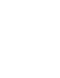</p>
</blockquote></td>
<td><blockquote>
<p>Preobucavanje neuralne mreze predstavlja situaciju kada se neuralna
mreza previse navikne odnosno previse dobro nauci trening dataset i tada
je tacnost na trening datasetu velika, dok tacnost na validacionom i
test skupu opada. Da se mreza ne bi preobucila, koristili smo rano
zaustavljanje i cekali 10 epoha da validacioni loss raste kako bi
prekinuli obucavanje.</p>
</blockquote></td>
</tr>
<tr class="even">
<td colspan="2"><blockquote>
<p>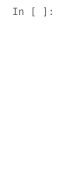</p>
</blockquote>
<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>acc <strong>=</strong>
history<strong>.</strong>history['accuracy']<br />
val_acc <strong>=</strong>
history<strong>.</strong>history['val_accuracy']<br />
loss <strong>=</strong> history<strong>.</strong>history['loss']<br />
val_loss <strong>=</strong>
history<strong>.</strong>history['val_loss']<br />
plt<strong>.</strong>figure()<br />
plt<strong>.</strong>subplot(121)<br />
plt<strong>.</strong>plot(acc)<br />
plt<strong>.</strong>plot(val_acc)<br />
plt<strong>.</strong>title('Accuracy')<br />
plt<strong>.</strong>subplot(122)<br />
plt<strong>.</strong>plot(loss)<br />
plt<strong>.</strong>plot(val_loss)<br />
plt<strong>.</strong>title('Loss')<br />
plt<strong>.</strong>show()</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></td>
</tr>
</tbody>
</table>

> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image28.png"
> style="width:3.59306in;height:2.15556in" />
>
> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image29.png"
> style="width:0.625in;height:1.70833in" />

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>def</strong> print_confusion_matrix(X):<br />
labels <strong>=</strong> np<strong>.</strong>array([])<br />
pred <strong>=</strong> np<strong>.</strong>array([])<br />
targetCorrect <strong>=None</strong><br />
targetIncorrect <strong>=None</strong><br />
classCorrect <strong>=None</strong><br />
classIncorrect <strong>=None</strong><br />
<strong>for</strong> img, lab <strong>in</strong> X:<br />
labels <strong>=</strong> np<strong>.</strong>append(labels, lab)<br />
pred <strong>=</strong> np<strong>.</strong>append(pred,
np<strong>.</strong>argmax(model<strong>.</strong>predict(img,
verbose<strong>=</strong>0), axis<strong>=</strong>1))</p>
<p><strong>for</strong> i <strong>in</strong> range(len(lab)):</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image30.png"
> style="width:0.625in;height:3.33333in" /><img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image34.png"
> style="width:7.61944in;height:6.7065in" />

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>if</strong>
labels[i]<strong>.</strong>astype(np<strong>.</strong>float32)<strong>==</strong>
pred[i]<strong>.</strong>astype(np<strong>.</strong>float32):
targetCorrect <strong>=</strong> img[i]<br />
classCorrect <strong>=</strong> lab[i]<br />
<strong>else</strong>:<br />
<strong>if</strong> targetIncorrect <strong>isNone</strong>:<br />
targetIncorrect <strong>=</strong> img[i]<br />
classIncorrect <strong>=</strong> lab[i]</p>
<p><strong>from</strong> sklearn.metrics <strong>import</strong>
accuracy_score<br />
print('Tačnost modela je: '<strong>+</strong>
str(100<strong>*</strong>accuracy_score(labels,
pred))<strong>+</strong>'%')</p>
<p><strong>from</strong> sklearn.metrics <strong>import</strong>
confusion_matrix, ConfusionMatrixDisplay<br />
cm <strong>=</strong> confusion_matrix(labels, pred,
normalize<strong>=</strong>'true')<br />
cmDisplay <strong>=</strong>
ConfusionMatrixDisplay(confusion_matrix<strong>=</strong>cm,
display_labels<strong>=</strong>classes)</p>
<p>cmDisplay<strong>.</strong>plot()<br />
fig <strong>=</strong> cmDisplay<strong>.</strong>figure_<br />
fig<strong>.</strong>set_figwidth(15)<br />
fig<strong>.</strong>set_figheight(15)<br />
plt<strong>.</strong>show()</p>
<p><strong>return</strong>(targetCorrect, classCorrect, targetIncorrect,
classIncorrect)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image31.png"
> style="width:0.625in;height:0.25in" />

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>correct, classCorrect, incorrect, classIncorrect <strong>=</strong>
print_confusion_matrix(Xval)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> Tačnost modela je: 51.73210161662818%

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p></p>
</blockquote>
<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>print_confusion_matrix(Xtrain)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image33.png"
> style="width:0.625in;height:0.15556in" />Tačnost modela je:
> 71.39561707035756%

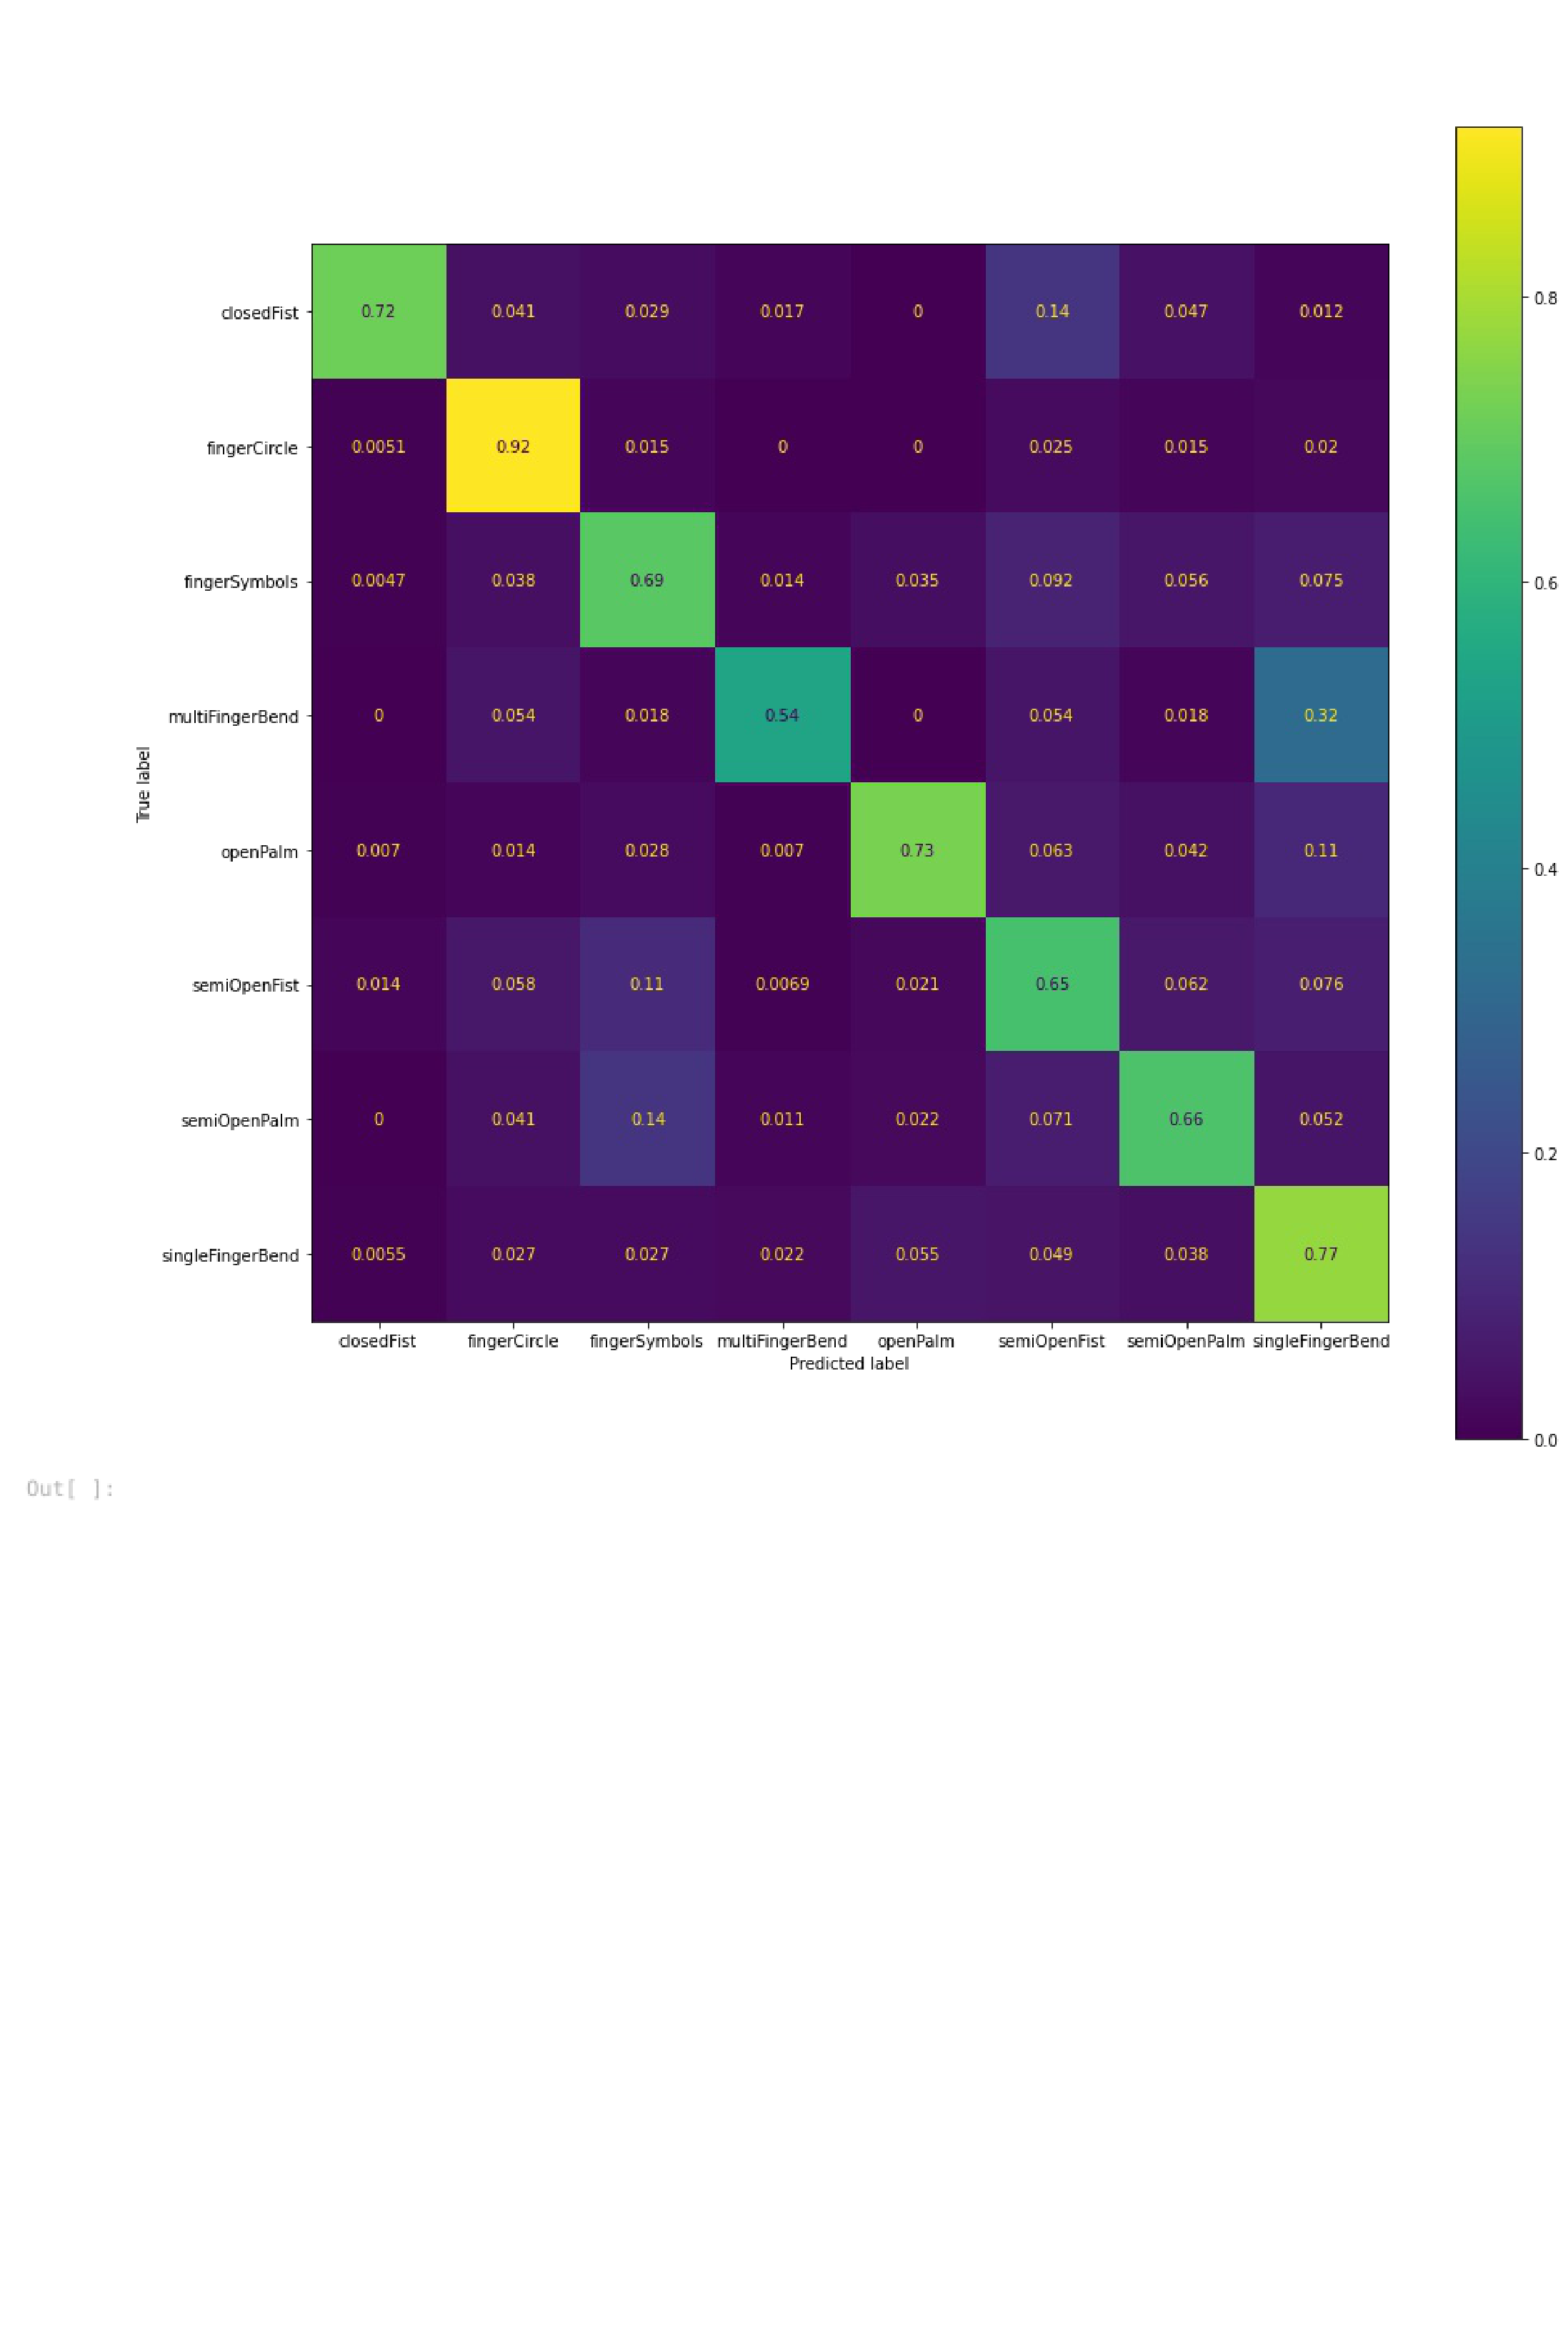

> (\<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=  
> array(\[\[\[197. , 190. , 182. \],  
> \[197. , 190. , 182. \],  
> \[197. , 190. , 182. \],  
> ...,  
> \[188.6732 , 179.6732 , 172.6732 \],  
> \[188.3086 , 179.3086 , 172.3086 \],  
> \[188.3086 , 179.3086 , 172.3086 \]\],
>
> \[\[197. , 190. , 182. \],  
> \[197. , 190. , 182. \],  
> \[197. , 190. , 182. \],  
> ...,  
> \[188.07422, 180.92578, 173. \],  
> \[188.07422, 180.92578, 173. \],  
> \[188.07422, 180.92578, 173. \]\],
>
> \[\[197. , 190. , 182. \],  
> \[197. , 190. , 182. \],  
> \[197. , 190. , 182. \],  
> ...,  
> \[188. , 181. , 173. \],  
> \[188. , 181. , 173. \],  
> \[188. , 181. , 173. \]\],
>
> ...,
>
> \[\[197. , 192. , 189. \],  
> \[197. , 192. , 189. \],  
> \[197. , 192. , 189. \],  
> ...,

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>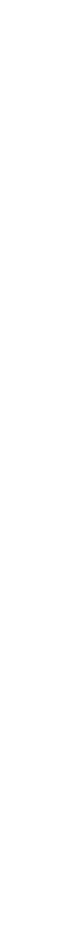</p>
</blockquote></th>
<th><blockquote>
<p>[192. , 187. , 184. ],<br />
[192. , 187. , 184. ],<br />
[192. , 187. , 184. ]],</p>
<p>[[197. , 192. , 189. ],<br />
[197. , 192. , 189. ],<br />
[197. , 192. , 189. ],<br />
...,<br />
[192.47266, 187.47266, 184.47266],<br />
[193. , 188. , 185. ],<br />
[193. , 188. , 185. ]],</p>
<p>[[197.6914 , 192.6914 , 189.6914 ],<br />
[197.6914 , 192.6914 , 189.6914 ],<br />
[197.6914 , 192.6914 , 189.6914 ],<br />
...,<br />
[192.83727, 187.83727, 184.83727],<br />
[193. , 188. , 185. ],<br />
[193. , 188. , 185. ]]], dtype=float32)&gt;, &lt;tf.Tensor: shape=(),
dtype=int32, numpy=5&gt;,<br />
&lt;tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=<br />
array([[[204.10547, 199.10547, 195.10547],<br />
[205. , 200. , 196. ],<br />
[205. , 200. , 196. ],<br />
...,<br />
[180.3268 , 176.3268 , 167.3268 ],<br />
[180.6914 , 176.6914 , 167.6914 ],<br />
[180.6914 , 176.6914 , 167.6914 ]],</p>
<p>[[204.93361, 199.93361, 195.93361],<br />
[205. , 200. , 196. ],<br />
[205. , 200. , 196. ],<br />
...,<br />
[180.4882 , 176.4882 , 167.4882 ],<br />
[180. , 176. , 167. ],<br />
[180. , 176. , 167. ]],</p>
<p>[[205. , 200. , 196. ],<br />
[205. , 200. , 196. ],<br />
[205. , 200. , 196. ],<br />
...,<br />
[181.52734, 177.52734, 168.52734],<br />
[181. , 177. , 168. ],<br />
[181. , 177. , 168. ]],</p>
<p>...,</p>
<p>[[211.0482 , 169.9518 , 150. ],<br />
[211.28523, 168.91016, 148.73438],<br />
[209.66368, 165.4336 , 144.17696],<br />
...,<br />
[181.52734, 176.52734, 172.52734],<br />
[181. , 176. , 172. ],<br />
[181.4857 , 176.4857 , 172.4857 ]],</p>
<p>[[209.77734, 166.77734, 147.77734],<br />
[209.77734, 166.14453, 147.14453],<br />
[207.7071 , 162.7071 , 143.7071 ],<br />
...,<br />
[181.4882 , 176.4882 , 172.4882 ],<br />
[181. , 176. , 172. ],<br />
[181. , 176. , 172. ]],</p>
<p>[[206.3086 , 163.3086 , 144.3086 ],<br />
[206.52736, 162.89455, 143.89455],<br />
[205.41797, 160.41797, 141.41797],<br />
...,<br />
[180.63539, 175.63539, 171.63539],<br />
[180.52736, 175.52736, 171.52736],<br />
[180.3086 , 175.3086 , 171.3086 ]]], dtype=float32)&gt;, &lt;tf.Tensor:
shape=(), dtype=int32, numpy=3&gt;)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image37.png"
> style="width:0.625in;height:1.33333in" />

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>plt<strong>.</strong>subplot(1,2,1)<br />
plt<strong>.</strong>imshow(correct<strong>.</strong>numpy()<strong>.</strong>astype('uint8'))<br />
plt<strong>.</strong>title(classes[classCorrect])<br />
plt<strong>.</strong>axis('off')</p>
<p>plt<strong>.</strong>subplot(1,2,2)<br />
plt<strong>.</strong>imshow(incorrect<strong>.</strong>numpy()<strong>.</strong>astype('uint8'))<br />
plt<strong>.</strong>title(classes[classIncorrect])<br />
plt<strong>.</strong>axis('off')</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image38.png"
> style="width:0.625in;height:0.25in" />(-0.5, 127.5, 127.5, -0.5)
>
> <img
> src="attachment:vertopal_251c631e81be4b159d49b638b06e43c7/media/image39.png"
> style="width:3.40833in;height:1.58333in" />

| Loading \[MathJax\]/jax/output/CommonHTML/fonts/TeX/fontdata.js |
|-----------------------------------------------------------------|
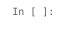
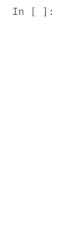
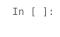
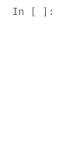
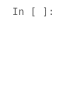
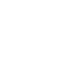
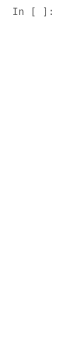
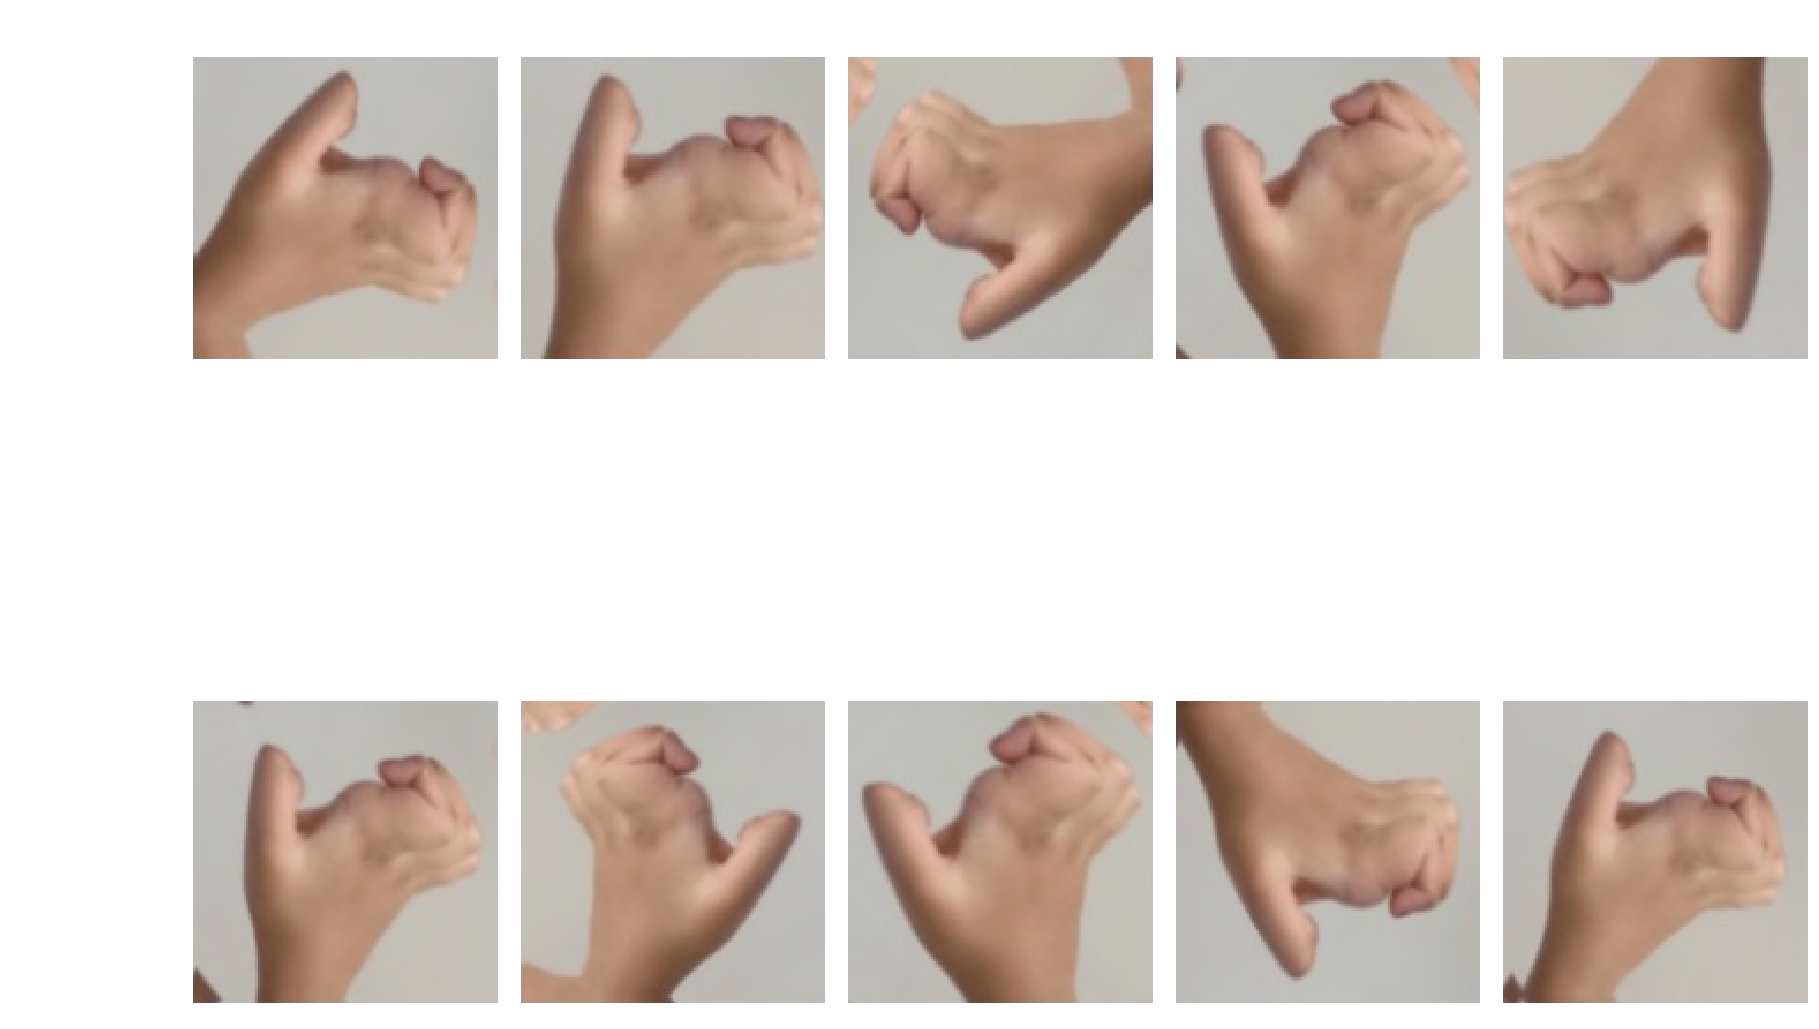
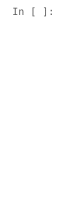
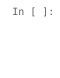
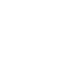
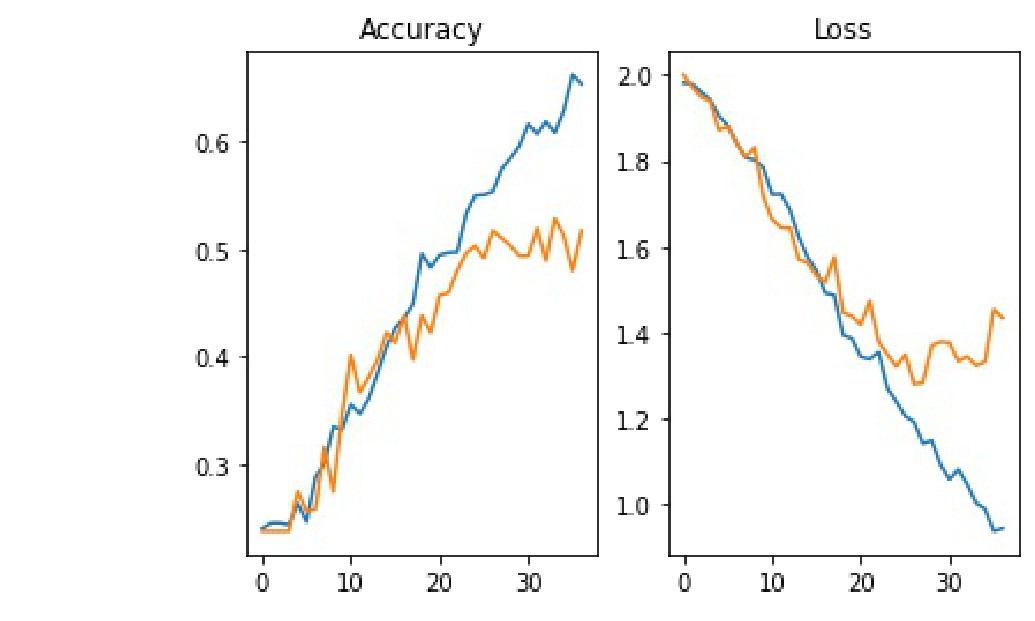
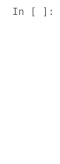
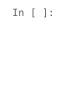
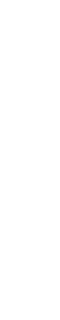
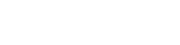
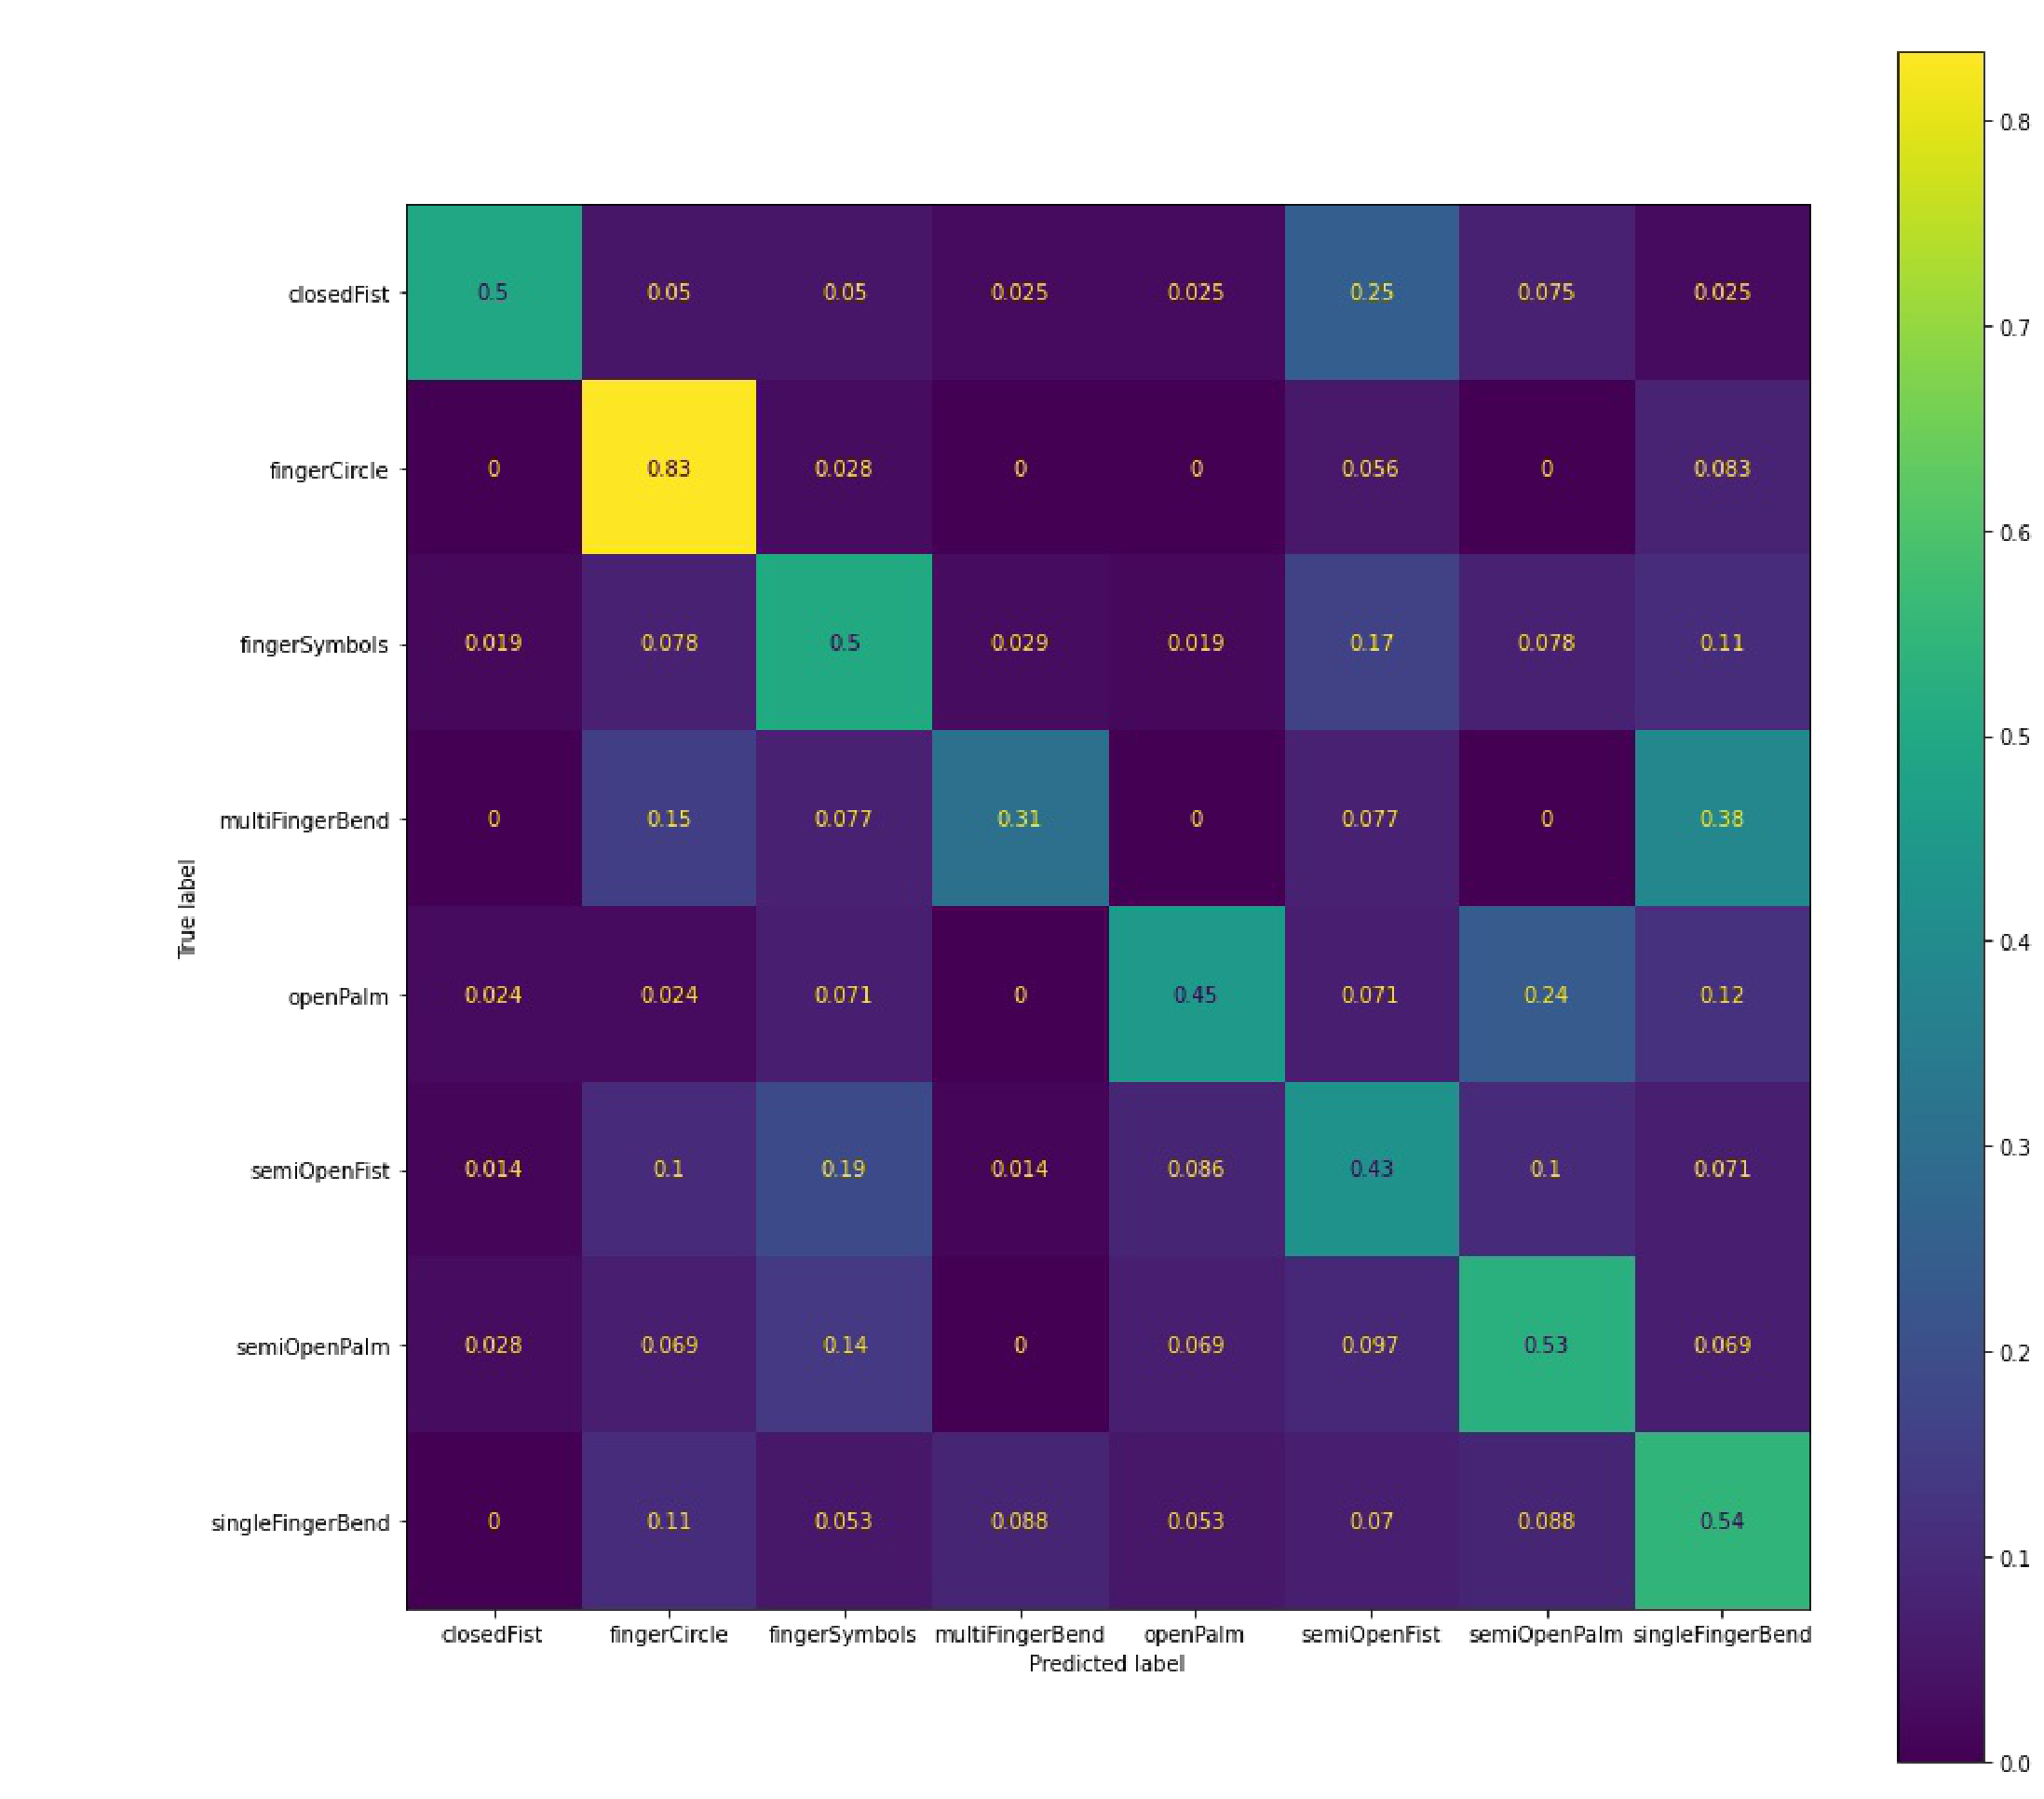
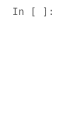
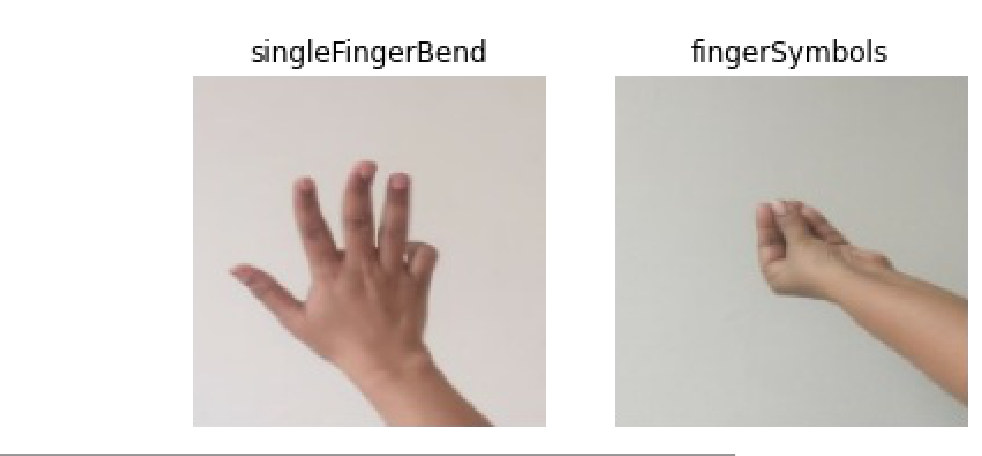
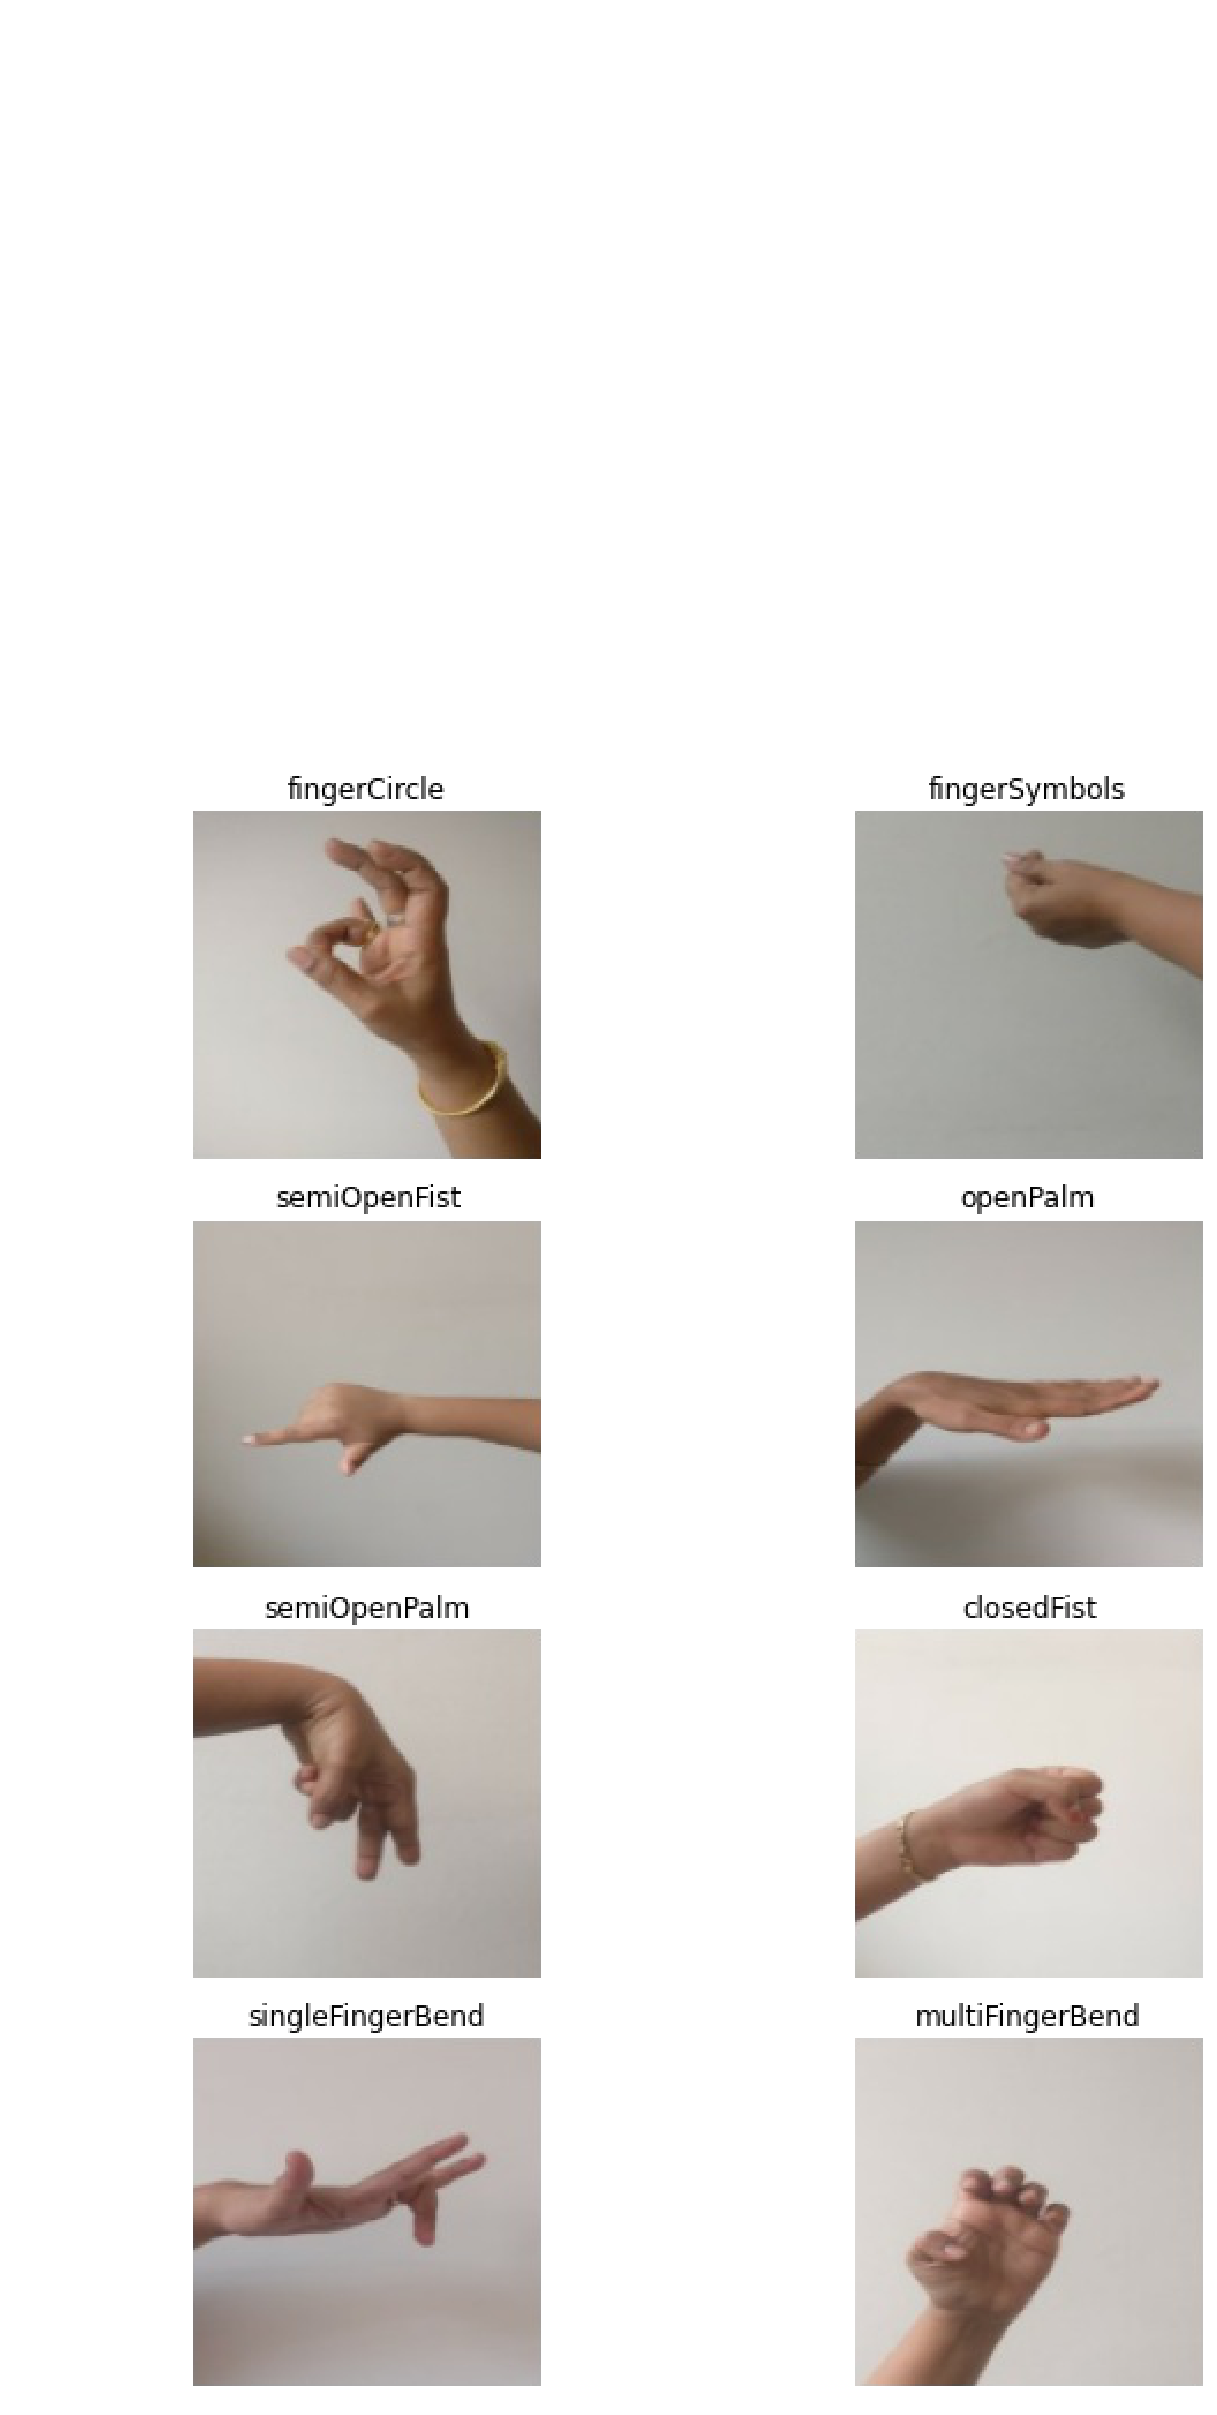